In [1]:
import numpy as np
# from google.colab import drive
# drive.mount('/content/drive')
import pandas as pd
# url = 'https://drive.google.com/uc?id={}'.format("1EpS1_XS3DkcLl-RG18Ooon4Vetyymdq_")
# df = pd.read_csv(url)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
df = pd.read_csv('..\diabetes.csv')

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_cl = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
correlation_matrix = df_cl.corr()

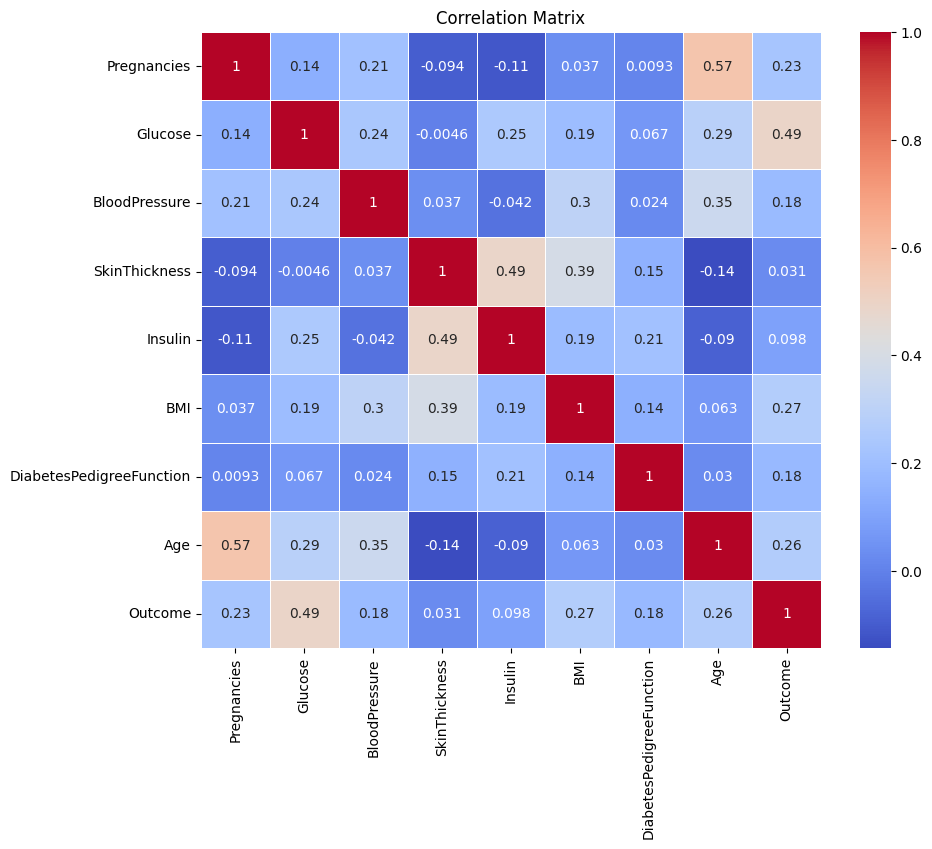

In [ ]:
#Creating a Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# x = df_cl.drop(['Outcome'], axis=1)
# y = df_cl['Outcome']
x = df.drop(['Outcome'], axis=1)
y = df['Outcome']

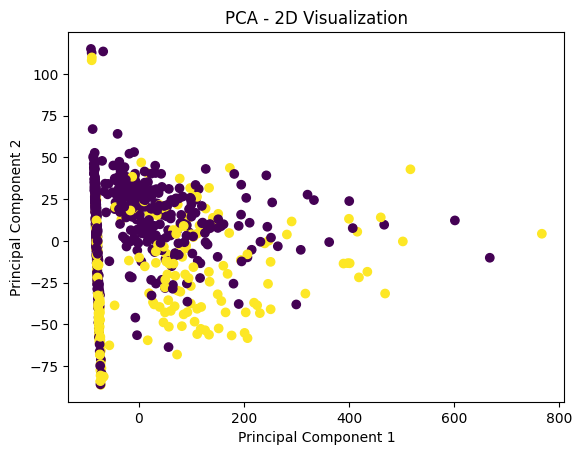

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'X' is your features DataFrame
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

y_values = y.squeeze()

# Plot the PCA-transformed version of the data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_values, cmap='viridis')  # Use 'c=y' for classification
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2D Visualization')
plt.show()

In [ ]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
# #weight Update rule 1
# def weight_update(w,x,y,y_pred):
#   if y_pred == y:
#     return w
#   elif y == 0:
#     w += x

#   elif y == 1:
#     w -= x
#   return w

In [ ]:
def unit_step_func(x):
    return np.where(x > 0, 1 ,0)
def sigmoid (x):
  return 1/(1 + np.exp(-x))

In [ ]:
class Perceptron:
    def __init__(self, learning_rate = 0.01,n_iters = 1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = unit_step_func
        # self.activation_func = sigmoid
        self.weight = None
        self.bias = None

    def fit(self, x, y):
        n_samples , n_features = x.shape
        self.weight = np.zeros(n_features)

        #learn weight
        for i in range(self.n_iters):
            for idx, x_i in enumerate(x):
                linear_output1 = np.dot(x_i,self.weight)
                # linear_output1 = np.dot(x_i,self.weight)
                y_predicted = self.activation_func(linear_output1)

                #Weight Update rule
                if y_predicted == y[idx]:
                  continue
                elif y_predicted == 1 and y[idx]==0:
                  self.weight = self.weight - x_i
                elif y_predicted == 0 and y[idx] == 1:
                  self.weight = self.weight + x_i


    def predict(self , x):
        linear_output2 = np.dot(x,self.weight)
        Y_predicted = self.activation_func(linear_output2)
        return Y_predicted

In [ ]:
selected_feature = ['Glucose','BMI','Age']
x_db= x[selected_feature]
# x_db = x
print(x_db)

     Glucose   BMI  Age
0        148  33.6   50
1         85  26.6   31
2        183  23.3   32
3         89  28.1   21
5        116  25.6   30
..       ...   ...  ...
763      101  32.9   63
764      122  36.8   27
765      121  26.2   30
766      126  30.1   47
767       93  30.4   23

[639 rows x 3 columns]


In [ ]:
x_db = x_db.to_numpy()
y = y.to_numpy()

In [ ]:
def normalize_data(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    normalized_data = (data - mean) / std
    return normalized_data, mean, std

In [ ]:
normalized_dataset, mean, std = normalize_data(x_db)


Text(0.5, 0, 'Age')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

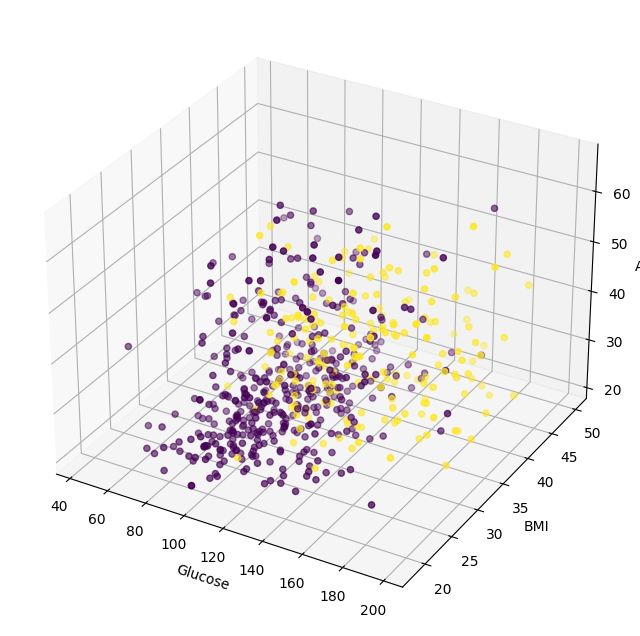

In [ ]:
%matplotlib widget
plt.figure(figsize= (10,8))
ax= plt.axes(projection = '3d')
fg = ax.scatter3D(x['Glucose'],x['BMI'],x['Age'], c= df['Outcome'])
ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
ax.set_zlabel('Age')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

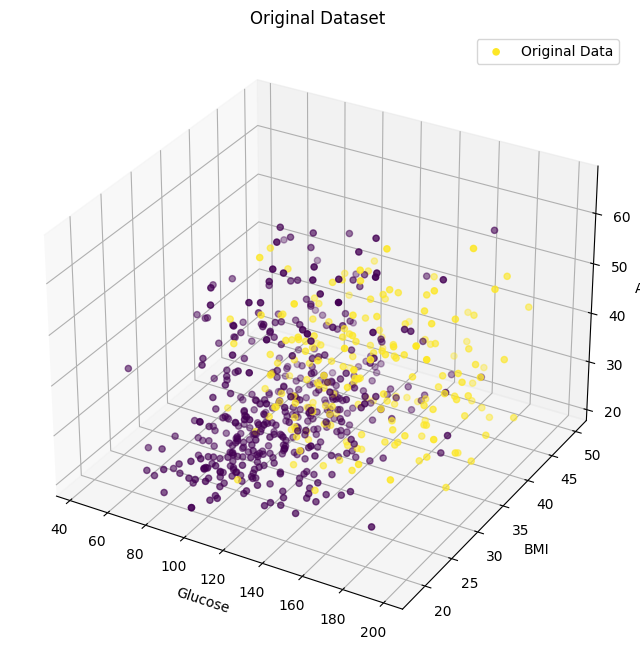

In [ ]:
%matplotlib inline
# Create a 3D scatter plot for the original and normalized datasets
plt.figure(figsize= (10,8))

# Original Dataset
ax1= plt.axes(projection = '3d')
ax1.scatter(x_db[:, 0], x_db[:, 1], x_db[:, 2], c=y, label='Original Data')
ax1.set_title('Original Dataset')
ax1.set_xlabel('Glucose')
ax1.set_ylabel('BMI')
ax1.set_zlabel('Age')
ax1.legend()

# plt.show()

In [ ]:

# Normalized Dataset
ax2 = fig.add_subplot(212, projection='3d')
ax2.scatter(normalized_dataset[:, 0], normalized_dataset[:, 1], normalized_dataset[:, 2], c=y, label='Normalized Data')
ax2.set_title('Normalized Dataset')
ax2.set_xlabel('Glucose')
ax2.set_ylabel('BMI')
ax2.set_zlabel('AGE')
ax2.legend()

plt.tight_layout()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x_db, y, test_size=0.30, random_state=0)

In [ ]:
clf = Perceptron()
clf.fit(x_train,y_train)
prediction = clf.predict(x_test)
prediction

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1])

In [ ]:
accuracy = np.sum(prediction == y_test)/ len(y_test)
accuracy

0.5677083333333334

In [ ]:
x_n, x_test_n, y_train, y_test = train_test_split(
    normalized_dataset, y, test_size=0.30, random_state=0)

In [ ]:
clf_norm = Perceptron()
clf_norm.fit(x_n,y_train)
prediction_n = clf_norm.predict(x_test_n)
prediction_n

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0])

In [ ]:
accuracy = np.sum(prediction_n == y_test)/ len(y_test)
accuracy

0.7447916666666666

In [ ]:
class Perceptron_MOD:
    def __init__(self, learning_rate = 1,n_iters = 1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = unit_step_func
        # self.activation_func = sigmoid
        self.weight = None
        self.bias = None

    def fit(self, x, y):
        n_samples , n_features = x.shape
        # print(f" n features {n_features}")
        # print(f" n samples {n_samples}")
        # self.weight = np.ones(n_features)
        self.weight = np.zeros(n_features)
        print(f"weight {self.weight}")
        # self.bias = -1
        # y_ = np.where(y>0 , 1 , 0)
        #learn weight
        for i in range(self.n_iters):
            for idx, x_i in enumerate(x):
                linear_output1 = np.dot(x_i,self.weight)
                # linear_output1 = np.dot(x_i,self.weight)
                y_predicted = self.activation_func(linear_output1)
                #print(y_predicted)

                #Weight Update Modified Rule
                if y_predicted == y[idx]:
                  continue
                elif y_predicted == 1 and y[idx]==0:
                  self.weight = self.weight - (self.lr*x_i)
                elif y_predicted == 0 and y[idx] == 1:
                  self.weight = self.weight + (self.lr*x_i)



                # if y_predicted == y[idx]:
                #   self.weight = self.weight
                # elif y[idx] != y_predicted and y[idx]==0:
                #   self.weight = self.weight + (self.lr*x_i)
                # elif y_predicted == 1 and y[idx] == 0:
                #   self.weight = self.weight - (self.lr*x_i)




                # update = self.lr * (y[idx] - y_predicted)
                # self.weight += update * x_i
                # self.bias += update
            # print(f"W upadate at iteration {i} w= {self.weight}")
    def predict(self , x):
        # linear_output2 = np.dot(x,self.weight) + self.bias
        linear_output2 = np.dot(x,self.weight)
        Y_predicted = self.activation_func(linear_output2)
        # return linear_output2
        return Y_predicted

In [ ]:
clf_norm2 = Perceptron_MOD()
clf_norm2.fit(x_n,y_train)
prediction_n2 = clf_norm2.predict(x_test_n)
prediction_n2

weight [0. 0. 0.]


array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0])

In [ ]:
clf2 = Perceptron_MOD()
clf2.fit(x_n,y_train)
prediction2 = clf2.predict(x_test_n)
prediction2

weight [0. 0. 0.]


array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0])

In [ ]:
accuracy = np.sum(prediction2 == y_test)/ len(y_test)
accuracy

0.7447916666666666

In [ ]:
weight = np.zeros(3)

In [ ]:
class Perceptron_:
    def __init__(self, learning_rate = 0.1,n_iters = 1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = unit_step_func
        # self.activation_func = sigmoid
        self.weight = None
        self.bias = None

    def fit(self, x, y):
        n_samples , n_features = x.shape
        # print(f" n features {n_features}")
        # print(f" n samples {n_samples}")
        self.weight = np.zeros(n_features)
        # self.weight = np.random.rand(n_features)
        print(f"weight {self.weight}")

        # y_ = np.where(y>0 , 1 , 0)
        #learn weight
        for i in range(self.n_iters):
            for idx, x_i in enumerate(x):
                linear_output1 = np.dot(x_i,self.weight)
                y_predicted = self.activation_func(linear_output1)
                #print(y_predicted)


                #Weight Update using idrow-Hoff delta rule
                update = self.lr * (y[idx] - y_predicted)
                self.weight += update * x_i


        print(self.weight)
            # print(f"W upadate at iteration {i} w= {self.weight}")
    def predict(self , x):
        # linear_output2 = np.dot(x,self.weight) + self.bias
        linear_output2 = np.dot(x,self.weight)
        Y_predicted = self.activation_func(linear_output2)
        # return linear_output2
        return Y_predicted

In [ ]:
clf3 = Perceptron_(learning_rate=1)
clf3.fit(x_n,y_train)
prediction3 = clf3.predict(x_test_n)
prediction3

weight [0. 0. 0.]
[1.00633496 1.28390611 1.43887062]


array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0])

In [ ]:
accuracy = np.sum(prediction3 == y_test)/ len(y_test)
accuracy

0.7447916666666666

In [ ]:
x2d = normalized_dataset[:,:2]
x2d

array([[ 0.99135111,  0.24797421],
       [-1.170674  , -0.84085334],
       [ 2.19247617, -1.35415776],
       ...,
       [ 0.06476892, -0.90307206],
       [ 0.23635821, -0.29643957],
       [-0.89613113, -0.24977553]])

In [ ]:
x_t2D, x_test, y_train, y_test = train_test_split(
    x2d, y, test_size=0.30, random_state=0)

In [ ]:
clf4 = Perceptron_()
clf4.fit(x_t2D,y_train)
prediction4 = clf4.predict(x_test)
prediction4

weight [0. 0.]
[0.0029001  0.17670262]


array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0])

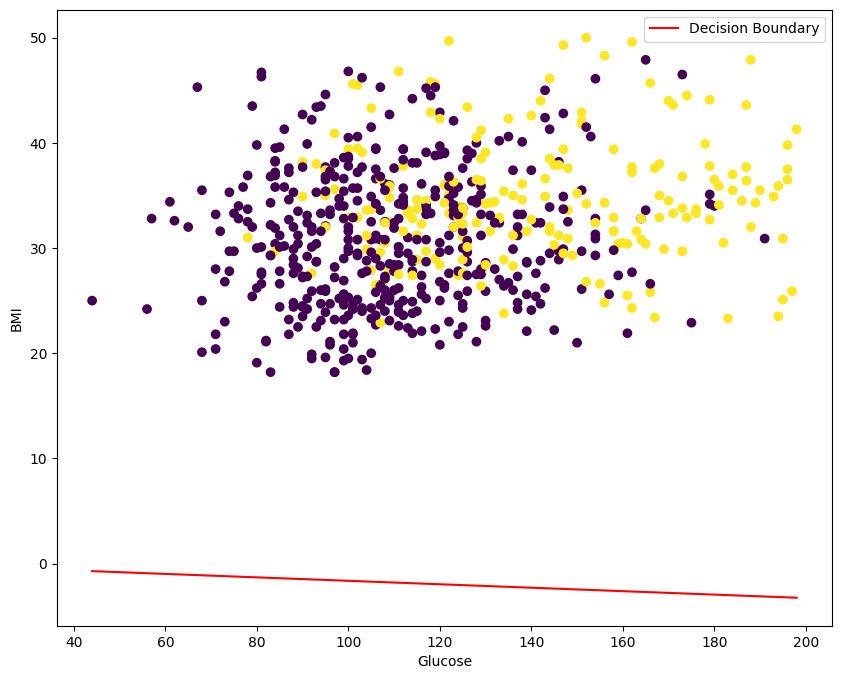

In [ ]:
# Assuming you have learned the weights as 'weight' and the bias as 'bias'
a, b = 0.0029001  ,0.17670262 # Extract the coefficients from the weight vector
c = 0# Extract the bias

# Create a scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

# Scatter plot
scatter = ax.scatter(x['Glucose'], x['BMI'], c=y)

# Define a range of x values for the line
x_values = np.linspace(x['Glucose'].min(), x['Glucose'].max(), 100)

# Calculate the corresponding y values based on the perceptron's decision boundary equation
y_values = (-a * x_values - c) / b

# Plot the line separator
ax.plot(x_values, y_values, c='red', label='Decision Boundary')

# Label axes
ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')

# Show the plot
plt.legend()
plt.show()


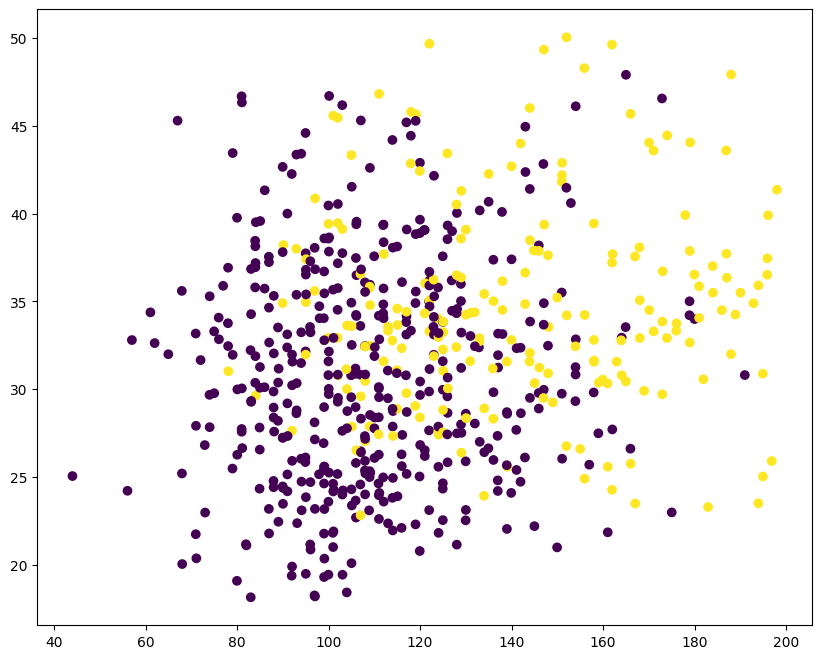

In [ ]:
jittered_x1 = x['Glucose'] + np.random.normal(0, 0.05, len(x))
jittered_x2 = x['BMI'] + np.random.normal(0, 0.05, len(x))
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
scatter = ax.scatter(jittered_x1, jittered_x2, c=y)
plt.show()


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

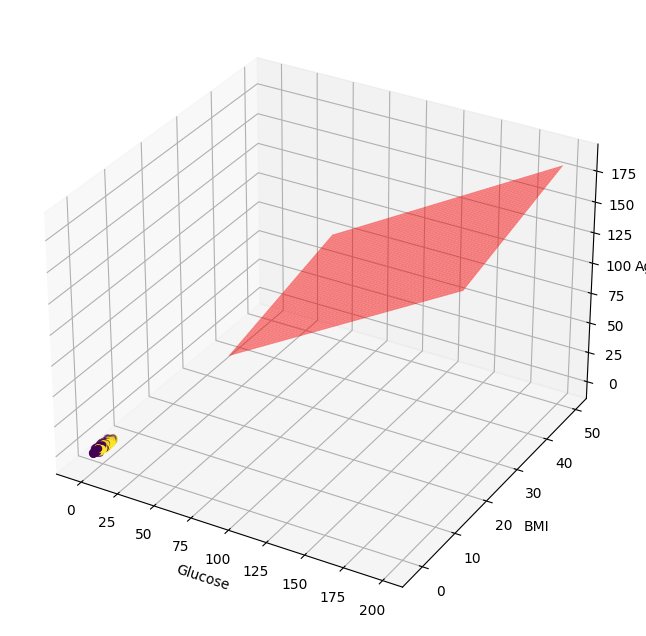

In [ ]:
%matplotlib inline
# Assuming you have learned the weights as 'weight' and the bias as 'bias'
a, b, c = [1.00633496 , 1.28390611 , 1.43887062]  # Extract the coefficients from the weight vector
d = 0  # Calculate the constant d

# Create a meshgrid for the feature space
xx, yy = np.meshgrid(np.linspace(x['Glucose'].min(), x['Glucose'].max(), 50),
                     np.linspace(x['BMI'].min(), x['BMI'].max(), 50))

# Calculate the corresponding values of 'Age' on the decision boundary plane
zz = (a * xx + b * yy - d) / c

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(normalized_dataset[:, 0], normalized_dataset[:, 1], normalized_dataset[:, 2], c=y)

# Plot the decision boundary
ax.plot_surface(xx, yy, zz, color='red', alpha=0.5, label='Decision Boundary')

# Label axes
ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
ax.set_zlabel('Age')

# Show the plot
plt.show()


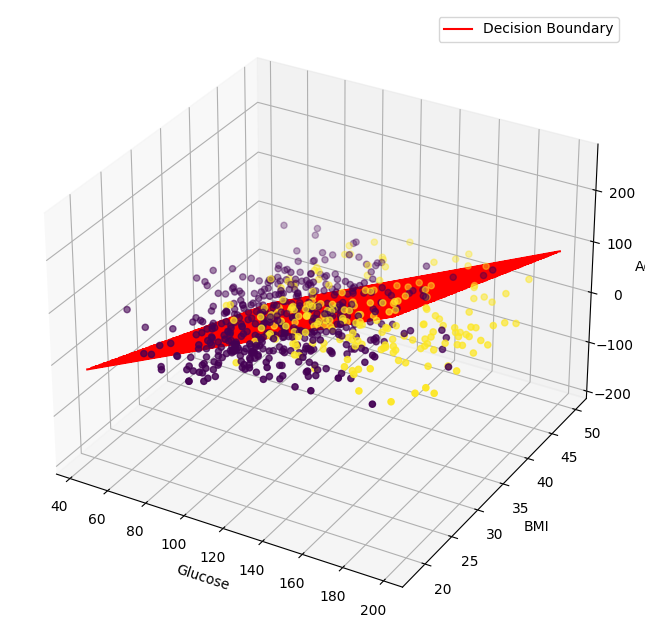

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have the coefficients 'a', 'b', 'c', and 'd'
a, b, c, d = 0.0181, -0.05329, -0.0102, 0

# Create a range of values for 'x' and 'y'
x_range = np.linspace(x['Glucose'].min(), x['Glucose'].max(), 50)
y_range = np.linspace(x['BMI'].min(), x['BMI'].max(), 50)

# Create a meshgrid for 'x' and 'y'
xx, yy = np.meshgrid(x_range, y_range)

# Calculate the corresponding values of 'z' based on the equation
zz = (-a * xx - b * yy - d) / c

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(x['Glucose'], x['BMI'], x['Age'], c=y)

# Plot the decision boundary as a line
ax.plot(np.ravel(xx), np.ravel(yy), np.ravel(zz), c='red', label='Decision Boundary')

# Label axes
ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
ax.set_zlabel('Age')

# ax.view_init(elev=-20, azim=-200)

# Show the plot
plt.legend()
plt.show()




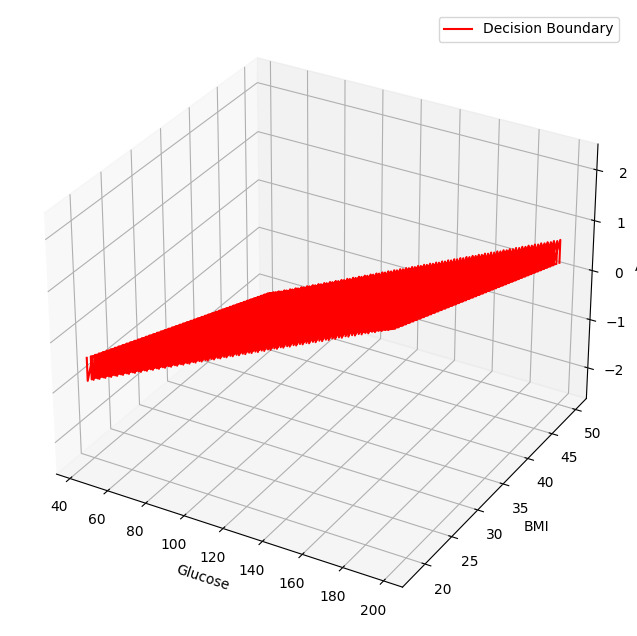

In [ ]:
# Assuming you have the coefficients 'a', 'b', 'c', and 'd'
a, b, c, d = 0.0181, -0.05329, -0.0102, 0

# Create some sample data points
x1 = np.linspace(x['Glucose'].min(), x['Glucose'].max(), 50)
x2 = np.linspace(x['BMI'].min(), x['BMI'].max(), 50)
x3 = np.linspace(x['Age'].min(), x['Age'].max(), 50)

# Create a meshgrid for 'x1', 'x2', and 'x3'
X1, X2, X3 = np.meshgrid(x1, x2, x3)

# Calculate the corresponding values of 'y' based on the equation
Y = a * X1 + b * X2 + c * X3 + d

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the decision boundary as a line
ax.plot(np.ravel(X1), np.ravel(X2), np.ravel(Y), c='red', label='Decision Boundary')

# Label axes
ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
ax.set_zlabel('Age')

# Show the plot
plt.legend()
plt.show()
